<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/master/PyrenderEGLSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# https://github.com/mmatl/pyrender
# https://github.com/JonathanLehner/Colab-collection



In [1]:
# Install pyrender
!pip install pyrender

    100% |████████████████████████████████| 1.2MB 24.8MB/s 
    100% |████████████████████████████████| 327kB 36.7MB/s 
    100% |████████████████████████████████| 1.7MB 20.1MB/s 
    100% |████████████████████████████████| 1.0MB 30.5MB/s 
    100% |████████████████████████████████| 890kB 35.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/6f/51/06/a87be22e27875c892bb4abc0cc29d29fbe5ba24bb04bba6fa8
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built trimesh networkx
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3
  Found existing installation: pyglet 1.3.2
    Uninstalling pyglet-1.3.2:
      Successfully uninstalled pyglet-1.3.2


In [2]:
# Clone pyrender to get some sample models
!git clone https://github.com/mmatl/pyrender.git

Cloning into 'pyrender'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 768 (delta 26), reused 46 (delta 16), pack-reused 708
Receiving objects: 100% (768/768), 28.18 MiB | 37.97 MiB/s, done.
Resolving deltas: 100% (413/413), done.


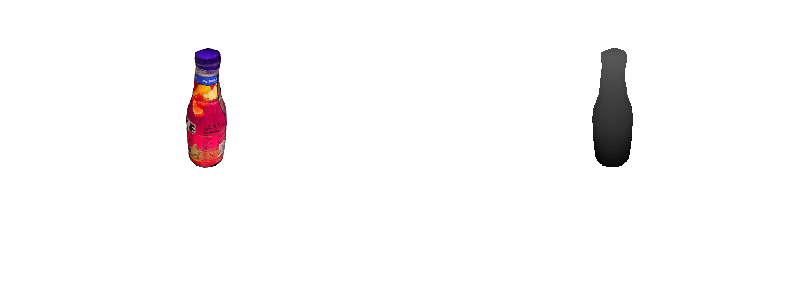

In [3]:
# Render offscreen -- make sure to set the PyOpenGL platform
import os
os.environ["PYOPENGL_PLATFORM"] = "egl"
import numpy as np
import trimesh
import pyrender

# Load the FUZE bottle trimesh and put it in a scene
fuze_trimesh = trimesh.load('pyrender/examples/models/fuze.obj')
mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
s = np.sqrt(2)/2
camera_pose = np.array([
       [0.0, -s,   s,   0.3],
       [1.0,  0.0, 0.0, 0.0],
       [0.0,  s,   s,   0.35],
       [0.0,  0.0, 0.0, 1.0],
    ])
scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
color, depth = r.render(scene)

# Show the images
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()

In [4]:
depth

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)